<h1>EDA Spotify tracks</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import scipy
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../data/tracks_with_binary_target.csv')
data.head()

,title,artist,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity,is_dance_pop
0,"Hey, Soul Sister",Train,3.693075,78.0,2010,97.0,89.0,67.0,-4.0,8.0,80.0,217.0,19.0,4.0,83,0
1,Love The Way You Lie,Eminem,44.814807,94.0,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82,0
2,TiK ToK,Kesha,6.410236,81.0,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80,1
3,Bad Romance,Lady Gaga,17.680180,89.0,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,79,1
4,Just the Way You Are,Bruno Mars,31.020064,93.0,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78,0


<h3>Descriptive statistics</h3>

In [5]:
data[data.columns.drop(['year', 'is_dance_pop'])].describe()

,followers,artist_popularity,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity
count,647.000000,647.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,17.103241,84.010819,118.633263,65.152320,59.505109,-5.628323,16.428526,48.269197,222.782187,13.249327,7.727730,67.673813
std,16.300460,7.991958,24.825331,24.322637,21.266827,2.770043,13.431093,25.632640,34.722627,20.302432,7.517026,14.672055
min,0.045373,52.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,5.470647,80.000000,100.000000,57.000000,54.000000,-6.903000,8.000000,30.000000,200.000000,1.000000,4.000000,61.000000
50%,10.823572,85.000000,120.000000,72.000000,65.000000,-5.000000,12.000000,50.000000,219.000000,5.000000,5.000000,70.000000
75%,25.495143,89.000000,129.000000,81.000000,73.000000,-4.000000,22.000000,67.000000,238.000000,15.000000,9.000000,78.000000
max,80.746303,99.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


<p>We can see from the counts that we have some missing values for the variables "followers" and "artist_popularity". Let's visualize their distributions, since the variables are continuous.</p>

<h3>Missing values</h3>

[]

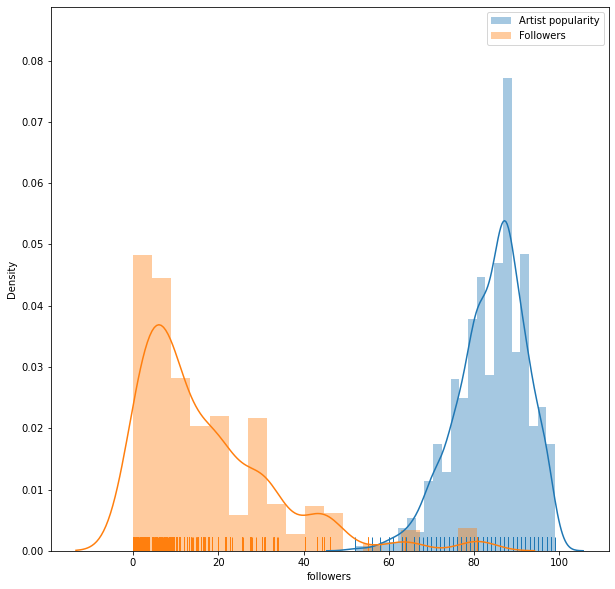

In [6]:
plt.figure(figsize=(10,10))
sns.distplot(data['artist_popularity'], kde=True, rug=True, label="Artist popularity")
sns.distplot(data['followers'], kde=True, rug=True, label="Followers")
plt.legend()
plt.plot()

<p>As we can see, the two distributions are skewed, with that being more evident with the distribution of the attribute "followers". Thus, it would be a better idea to impute with the median instead of the mean. <br>
Let's inspect the missingness.</p>

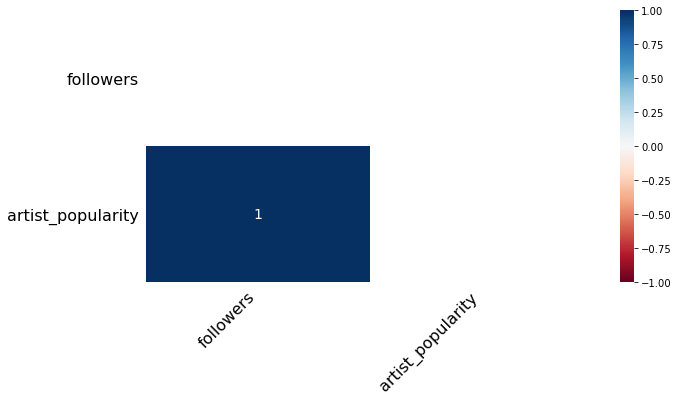

In [7]:
msno.heatmap(data, figsize=(10,5))
plt.show()

<p>We can see that the missing variables are really correlated in their missingness. It seams that the artists were not found by their name when searching with the Spotify Api.</p>

We can exploit this correlation for the imputation of missing values, but for now let's just impute with the median.

In [8]:
data = data.fillna(data.median())

In [9]:
data.isnull().sum()

title                0
artist               0
followers            0
artist_popularity    0
year                 0
tempo                0
energy               0
danceability         0
loudness             0
liveness             0
valence              0
duration             0
acousticness         0
speechiness          0
track_popularity     0
is_dance_pop         0
dtype: int64

<p>Now we have no more missing values.</p>

<h3>Visualizations</h3>

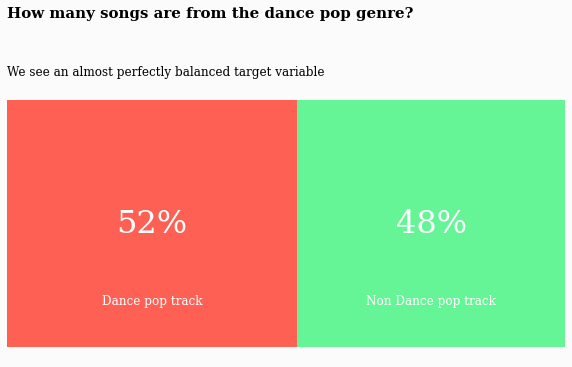

In [10]:
x=data.groupby(['is_dance_pop'])['is_dance_pop'].count()
y=len(data)
r=((x/y)).round(2)

ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(10, 5))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], 
        color='#ff4f42', alpha=0.9, label='Dance pop track')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], 
        color='#56f58b', alpha=0.9, label='Non Dance pop track')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", 
                   xy=(ratio[1.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Dance pop track", 
                   xy=(ratio[1.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Non Dance pop track", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,1.075,'How many songs are from the dance pop genre?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an almost perfectly balanced target variable',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend().set_visible(False)
plt.show()

<Figure size 720x720 with 0 Axes>

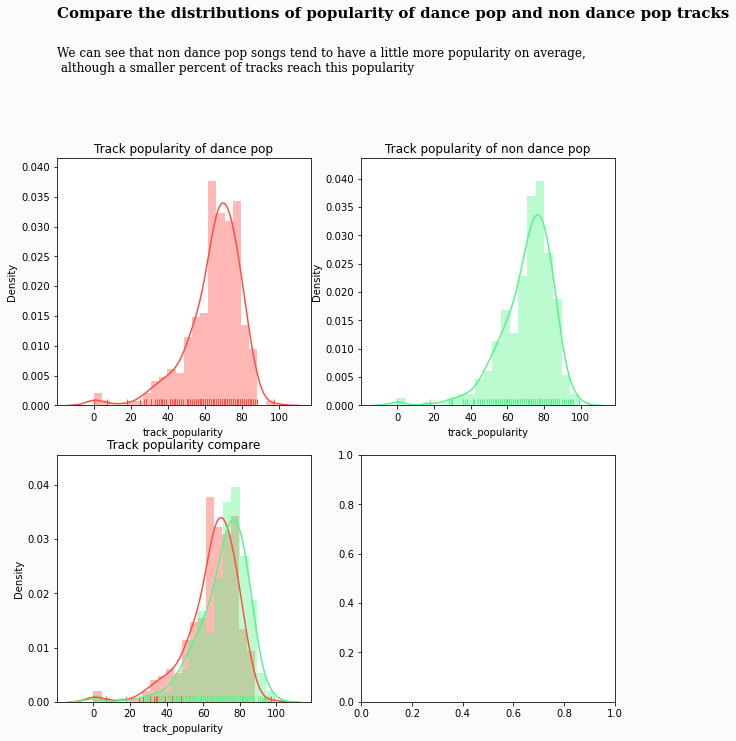

In [11]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2,2,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)

fig.text(0.125,1.075,'Compare the distributions of popularity of dance pop and non dance pop tracks', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,1.0,'We can see that non dance pop songs tend to have a little more popularity on average,\n although a smaller percent of tracks reach this popularity',fontfamily='serif',fontsize=12)  

plt.subplot(2,2,1)
sns.distplot(data[data['is_dance_pop']==1]['track_popularity'], color='#ff4f42', kde=True, rug=True)
plt.title('Track popularity of dance pop')
plt.subplot(2,2,2)
sns.distplot(data[data['is_dance_pop']==0]['track_popularity'], color='#56f58b', kde=True, rug=True)
plt.title('Track popularity of non dance pop')
plt.subplot(2,2,3)
sns.distplot(data[data['is_dance_pop']==1]['track_popularity'], color='#ff4f42', kde=True, rug=True)
sns.distplot(data[data['is_dance_pop']==0]['track_popularity'], color='#56f58b', kde=True, rug=True)
plt.title('Track popularity compare')
plt.show()

In [12]:
most_popular_artists = data['artist'].value_counts().sort_values(ascending=False).head(10).sort_values().to_frame()

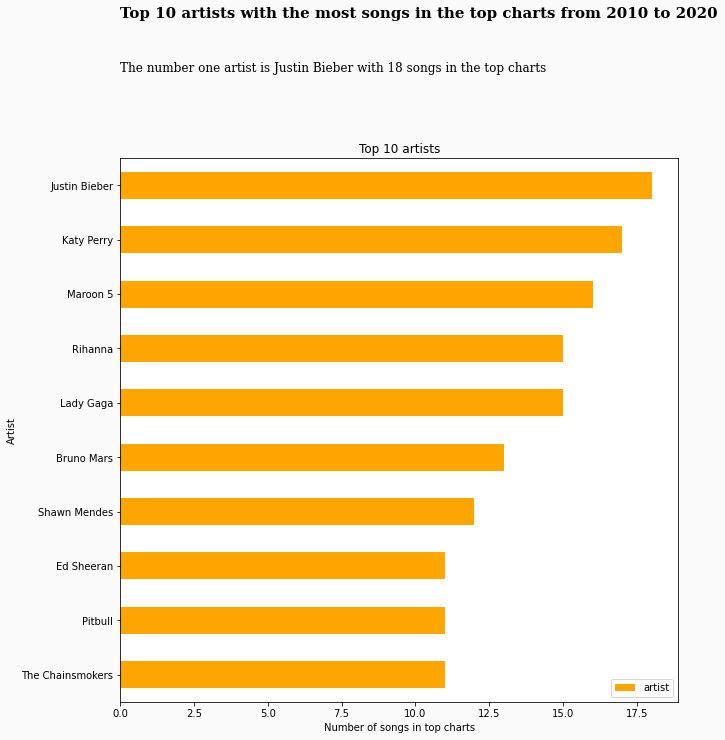

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)

fig.text(0.125,1.075,'Top 10 artists with the most songs in the top charts from 2010 to 2020', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,1.0,'The number one artist is Justin Bieber with 18 songs in the top charts',fontfamily='serif',fontsize=12)  
most_popular_artists.plot.barh(title='Top 10 artists', color='orange', ax=ax)
plt.xlabel('Number of songs in top charts')
plt.ylabel('Artist')
plt.show()

In [14]:
colors = ['#014f1b', '#027027', '#019132', '#03ab3c', '#04bf43',
          '#02d64a', '#02e34f', '#38ff7c', '#9cffbe', '#a7d9b8', '#70a181']

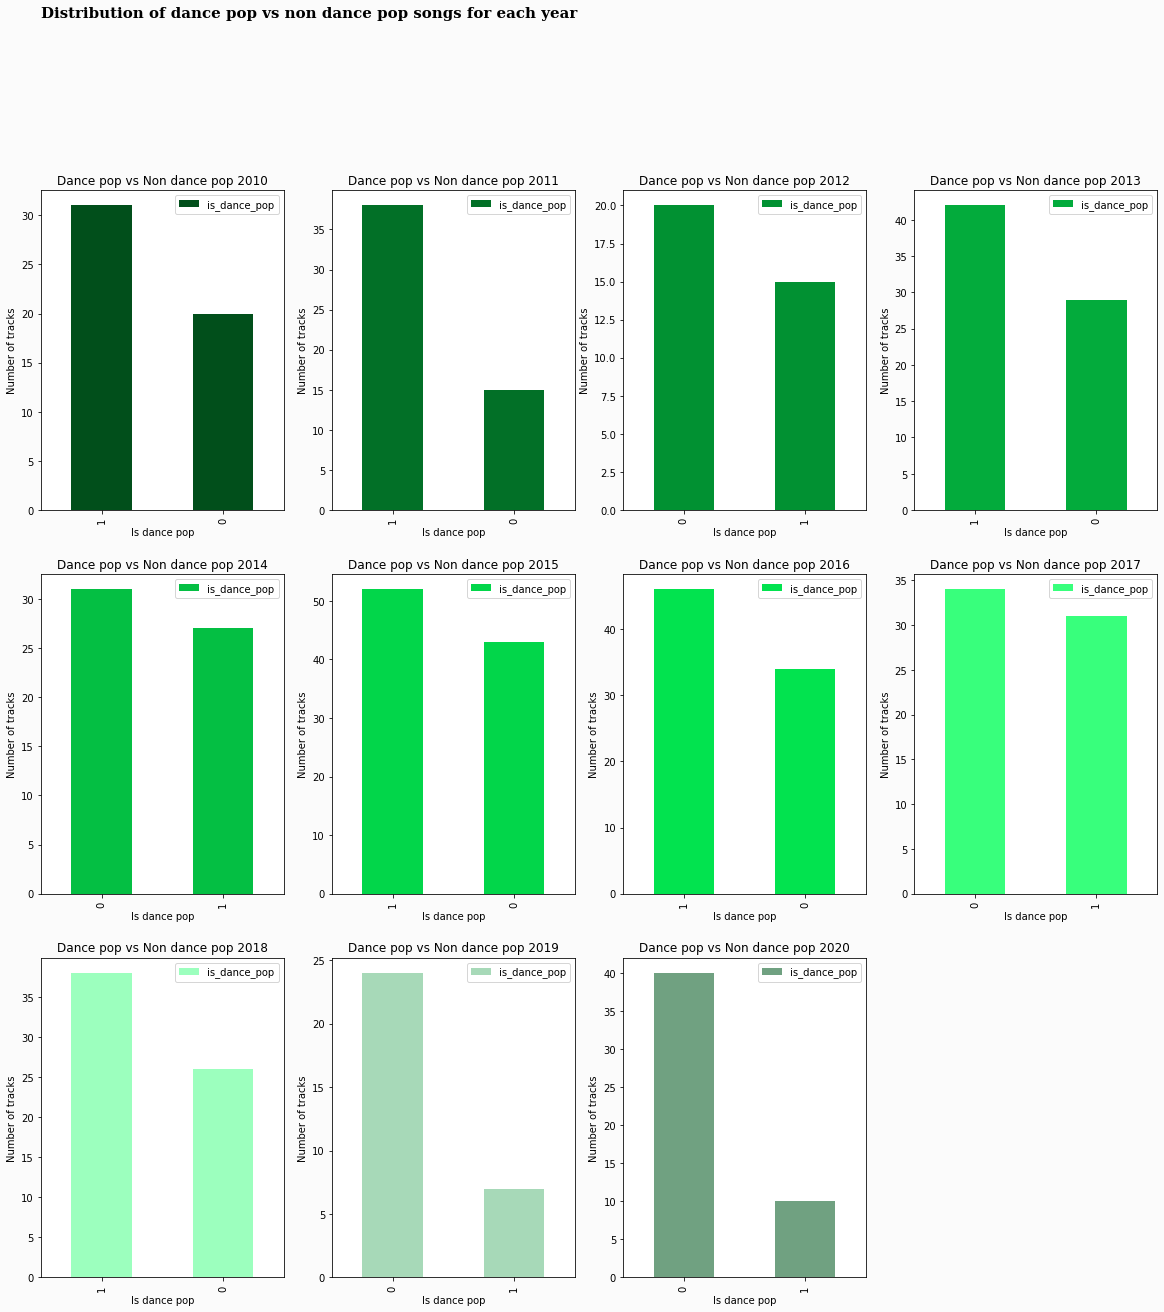

In [15]:
fig = plt.figure(figsize=(20, 20), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Distribution of dance pop vs non dance pop songs for each year', fontfamily='serif',fontsize=15, fontweight='bold')
for year in range(2010, 2021):
  yearly = data[data['year']==year]
  plt.subplot(3,4,year-2009)
  yearly['is_dance_pop'].value_counts().to_frame().plot.bar(title='Dance pop vs Non dance pop ' + str(year), ax=plt.gca(), color=colors[year-2010])
  plt.xlabel('Is dance pop')
  plt.ylabel('Number of tracks')
plt.show()

We can see that in the last two years, the prevalence of dance pop tracks is significantly lower than in previous years. Does this mean that dance pop lost its popularity recently?

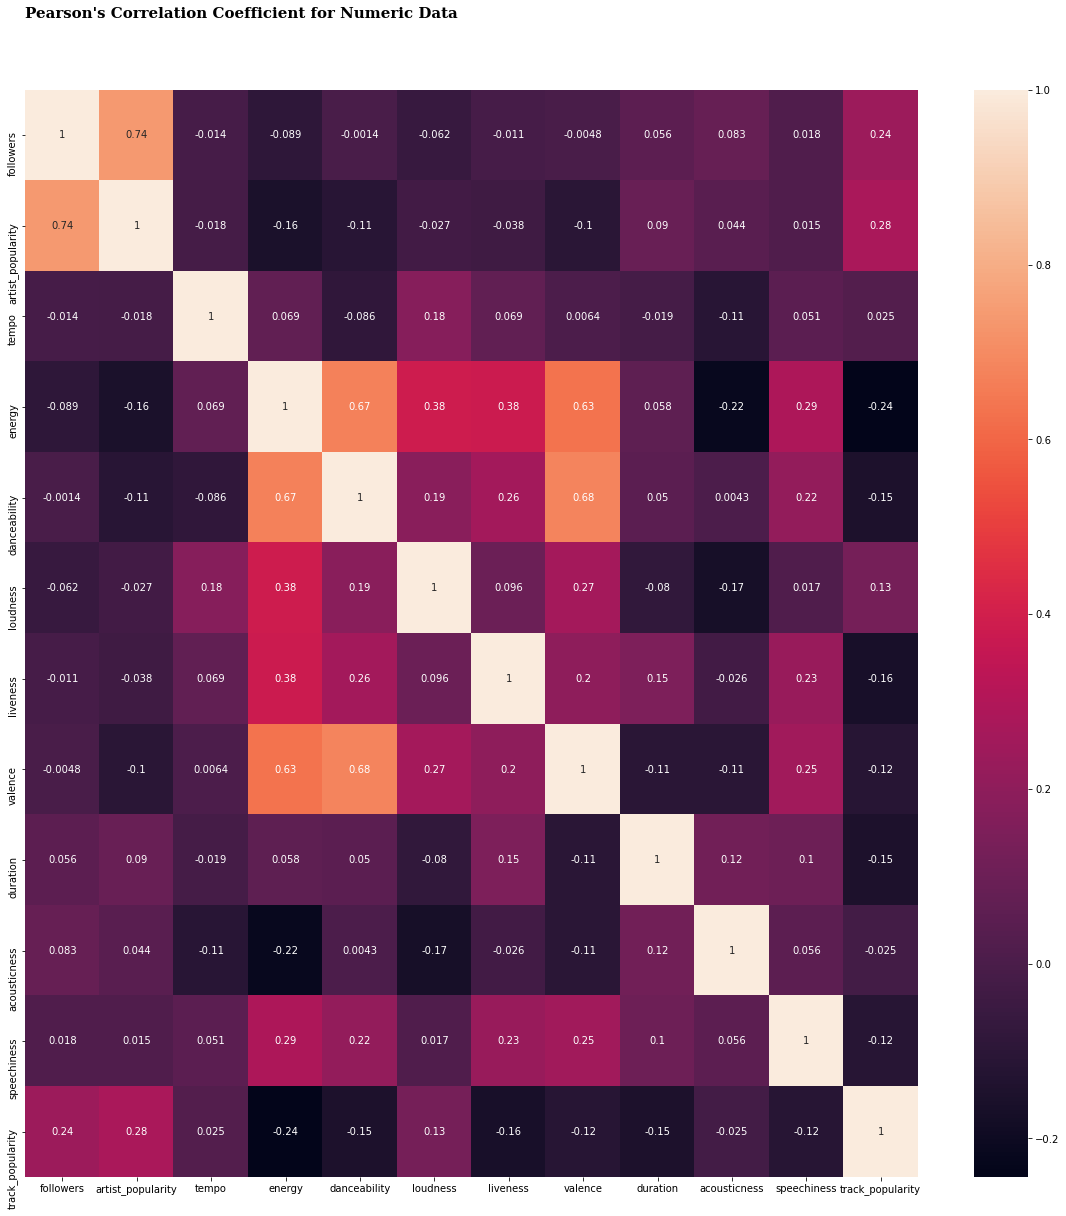

In [16]:
fig = plt.figure(figsize=(20,20))
fig.text(0.125,0.93,'Pearson\'s Correlation Coefficient for Numeric Data', fontfamily='serif',fontsize=15, fontweight='bold')
sns.heatmap(data[data.columns.drop(['year', 'is_dance_pop'])].corr(), annot=True)
plt.show()

<p>Now let's check Spearman Coefficient</p>

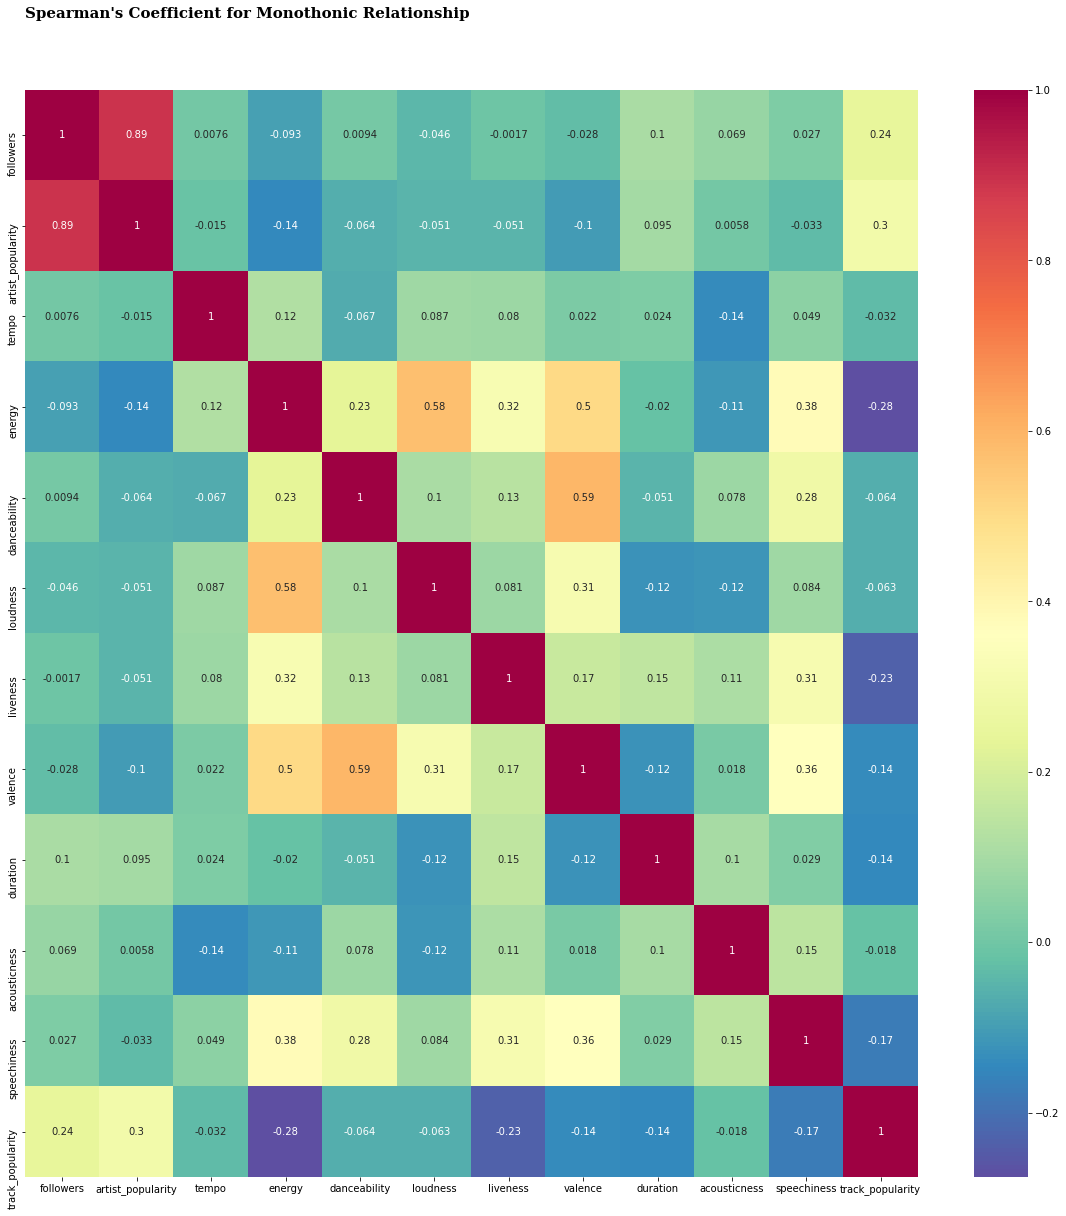

In [17]:
fig = plt.figure(figsize=(20,20))
fig.text(0.125,0.93,'Spearman\'s Coefficient for Monothonic Relationship', fontfamily='serif',fontsize=15, fontweight='bold')
sns.heatmap(data[data.columns.drop(['year', 'is_dance_pop'])].corr(method="spearman"), annot=True, cmap='Spectral_r')
plt.show()

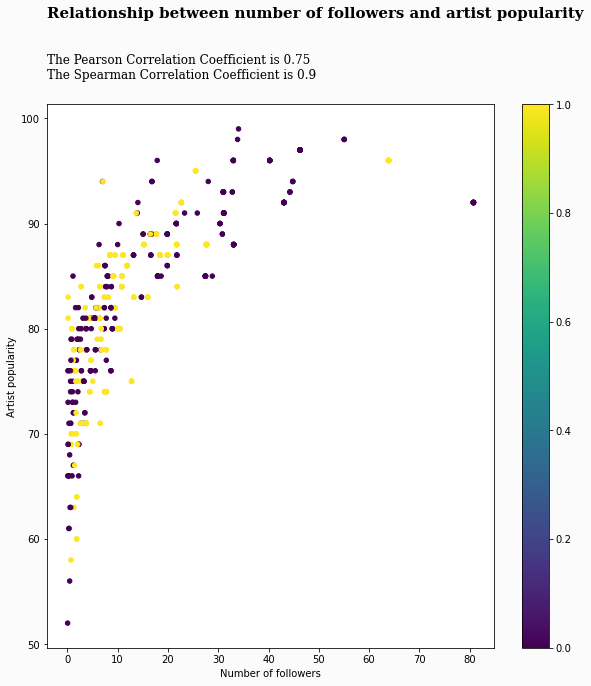

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Relationship between number of followers and artist popularity', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'The Pearson Correlation Coefficient is 0.75 \nThe Spearman Correlation Coefficient is 0.9',fontfamily='serif',fontsize=12)  

data.plot.scatter('followers', 'artist_popularity', c=data['is_dance_pop'], cmap='viridis', ax=ax)
plt.xlabel('Number of followers')
plt.ylabel('Artist popularity')
plt.show()

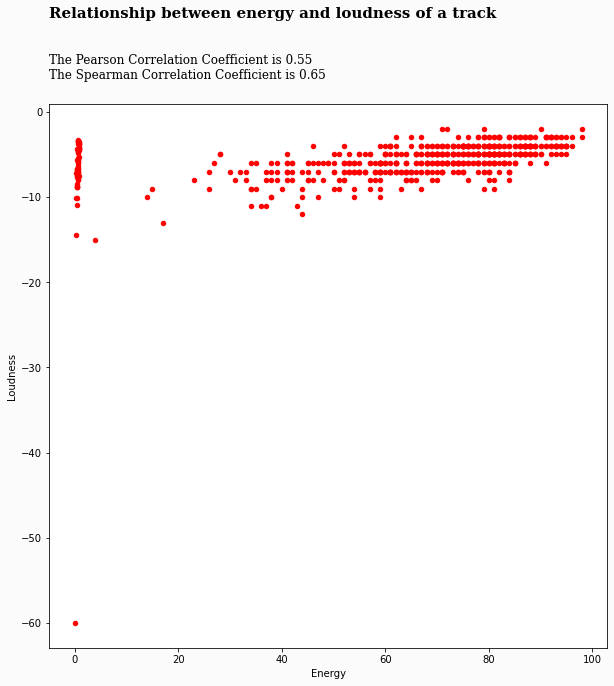

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Relationship between energy and loudness of a track', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'The Pearson Correlation Coefficient is 0.55 \nThe Spearman Correlation Coefficient is 0.65',fontfamily='serif',fontsize=12) 

data.plot.scatter('energy', 'loudness', ax=ax, color='red')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

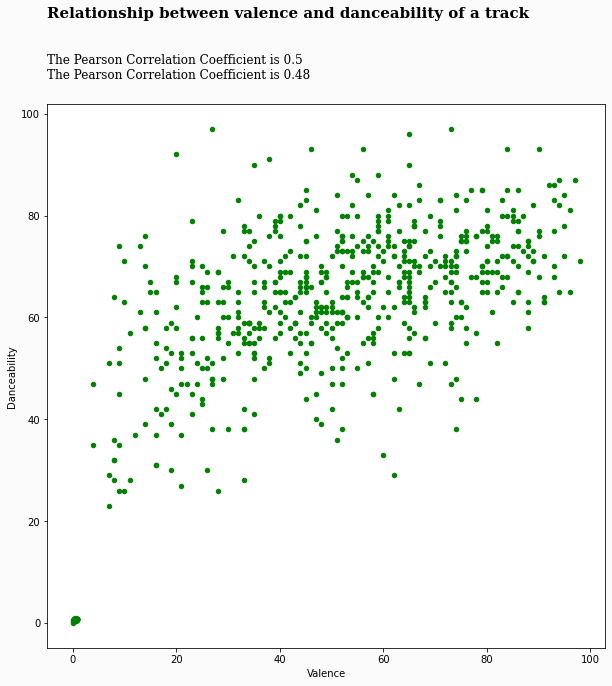

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Relationship between valence and danceability of a track', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'The Pearson Correlation Coefficient is 0.5\nThe Pearson Correlation Coefficient is 0.48',fontfamily='serif',fontsize=12)  

data.plot.scatter('valence', 'danceability', ax=ax, color='green')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.show()

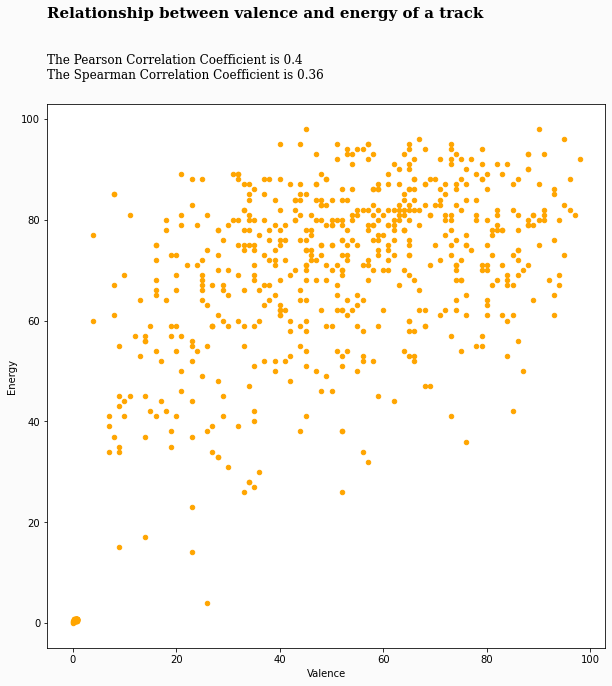

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Relationship between valence and energy of a track', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'The Pearson Correlation Coefficient is 0.4\nThe Spearman Correlation Coefficient is 0.36',fontfamily='serif',fontsize=12)  

data.plot.scatter('valence', 'energy', ax=ax, color='orange')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()

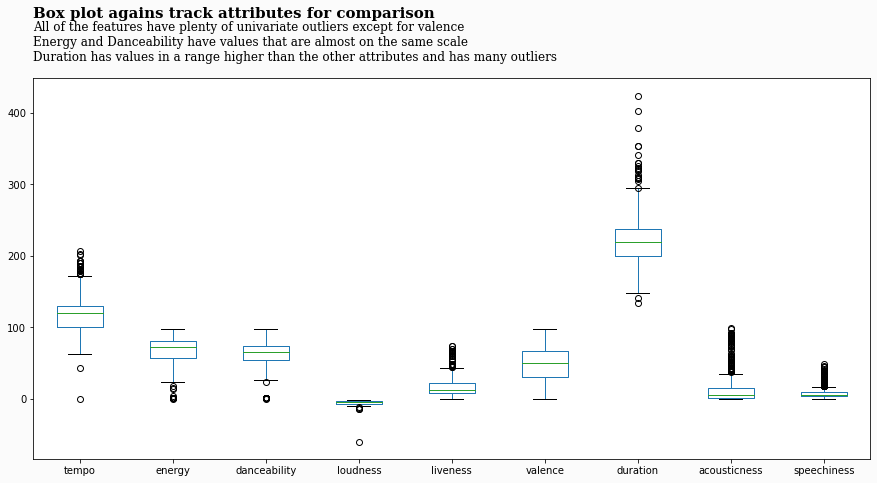

In [22]:
fig = plt.figure(figsize=(15,7))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Box plot agains track attributes for comparison', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'All of the features have plenty of univariate outliers except for valence\n' + 
        'Energy and Danceability have values that are almost on the same scale\n' + 
         'Duration has values in a range higher than the other attributes and has many outliers',fontfamily='serif',fontsize=12) 

data[['tempo','energy','danceability','loudness',	'liveness',	'valence', 'duration',	'acousticness','speechiness']].plot.box(ax=plt.gca())
plt.show()

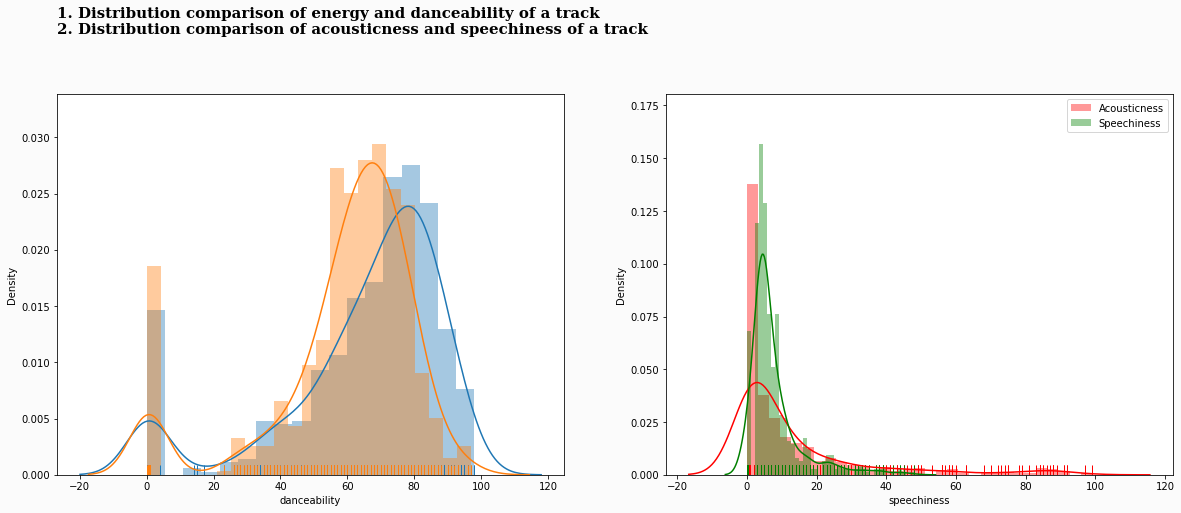

In [23]:
fig = plt.figure(figsize=(20,7))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'1. Distribution comparison of energy and danceability of a track\n' + 
         '2. Distribution comparison of acousticness and speechiness of a track', fontfamily='serif',fontsize=15, fontweight='bold')
plt.subplot(1,2,1)
sns.distplot(data['energy'], kde=True, rug=True, label='Energy', ax=plt.gca())
sns.distplot(data['danceability'], kde=True, rug=True, label='Danceability', ax=plt.gca())
plt.subplot(1,2,2)
sns.distplot(data['acousticness'], kde=True, rug=True, label='Acousticness', ax=plt.gca(), color='red')
sns.distplot(data['speechiness'], kde=True, rug=True, label='Speechiness', ax=plt.gca(), color='green')
plt.legend()
plt.show()

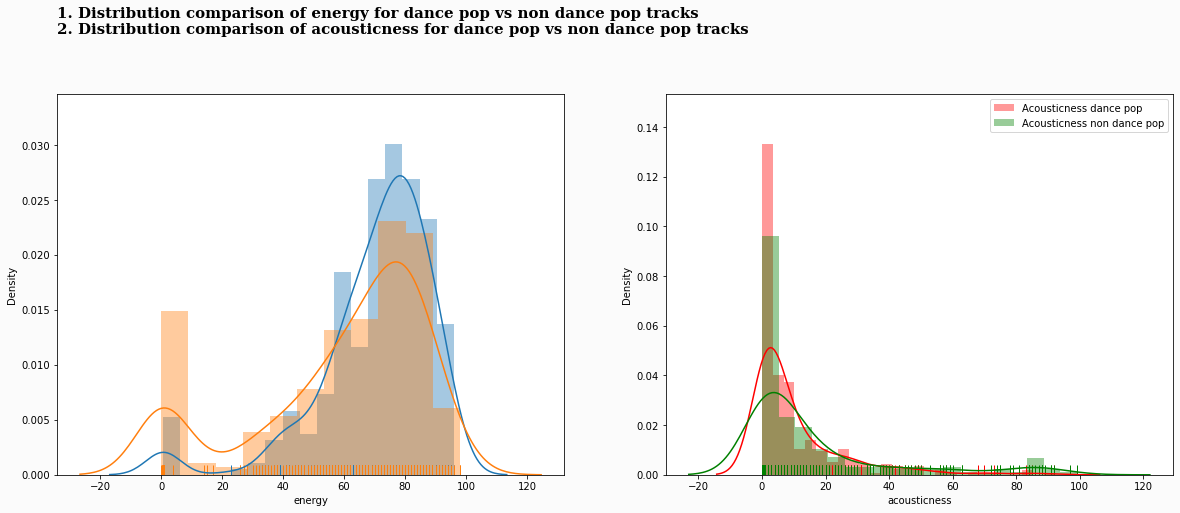

In [27]:
fig = plt.figure(figsize=(20,7))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'1. Distribution comparison of energy for dance pop vs non dance pop tracks\n' + 
         '2. Distribution comparison of acousticness for dance pop vs non dance pop tracks', fontfamily='serif',fontsize=15, fontweight='bold')
plt.subplot(1,2,1)
sns.distplot(data[data['is_dance_pop']==1]['energy'], kde=True, rug=True, label='Energy dance pop', ax=plt.gca())
sns.distplot(data[data['is_dance_pop']==0]['energy'], kde=True, rug=True, label='Energy non dance pop', ax=plt.gca())
plt.subplot(1,2,2)
sns.distplot(data[data['is_dance_pop']==1]['acousticness'], kde=True, rug=True, label='Acousticness dance pop', ax=plt.gca(), color='red')
sns.distplot(data[data['is_dance_pop']==0]['acousticness'], kde=True, rug=True, label='Acousticness non dance pop', ax=plt.gca(), color='green')
plt.legend()
plt.show()

We can see that the energy and acousticness will not be very distinguishing attributes for the binary classification since they overlap very much.

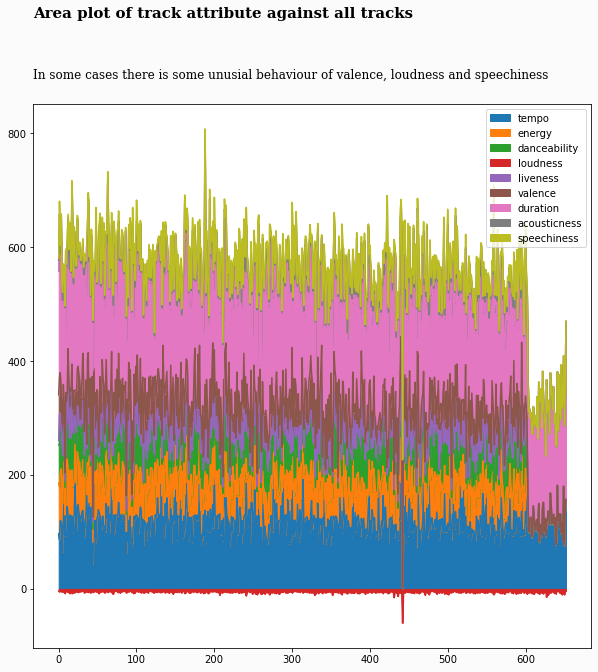

In [28]:
fig = plt.figure(figsize=(10,10))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
fig.text(0.125,1.0,'Area plot of track attribute against all tracks', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'In some cases there is some unusial behaviour of valence, loudness and speechiness',fontfamily='serif',fontsize=12) 
data.plot.area(y=['tempo','energy','danceability','loudness',	'liveness',	'valence', 'duration',	'acousticness','speechiness'], ax=plt.gca())
plt.show()

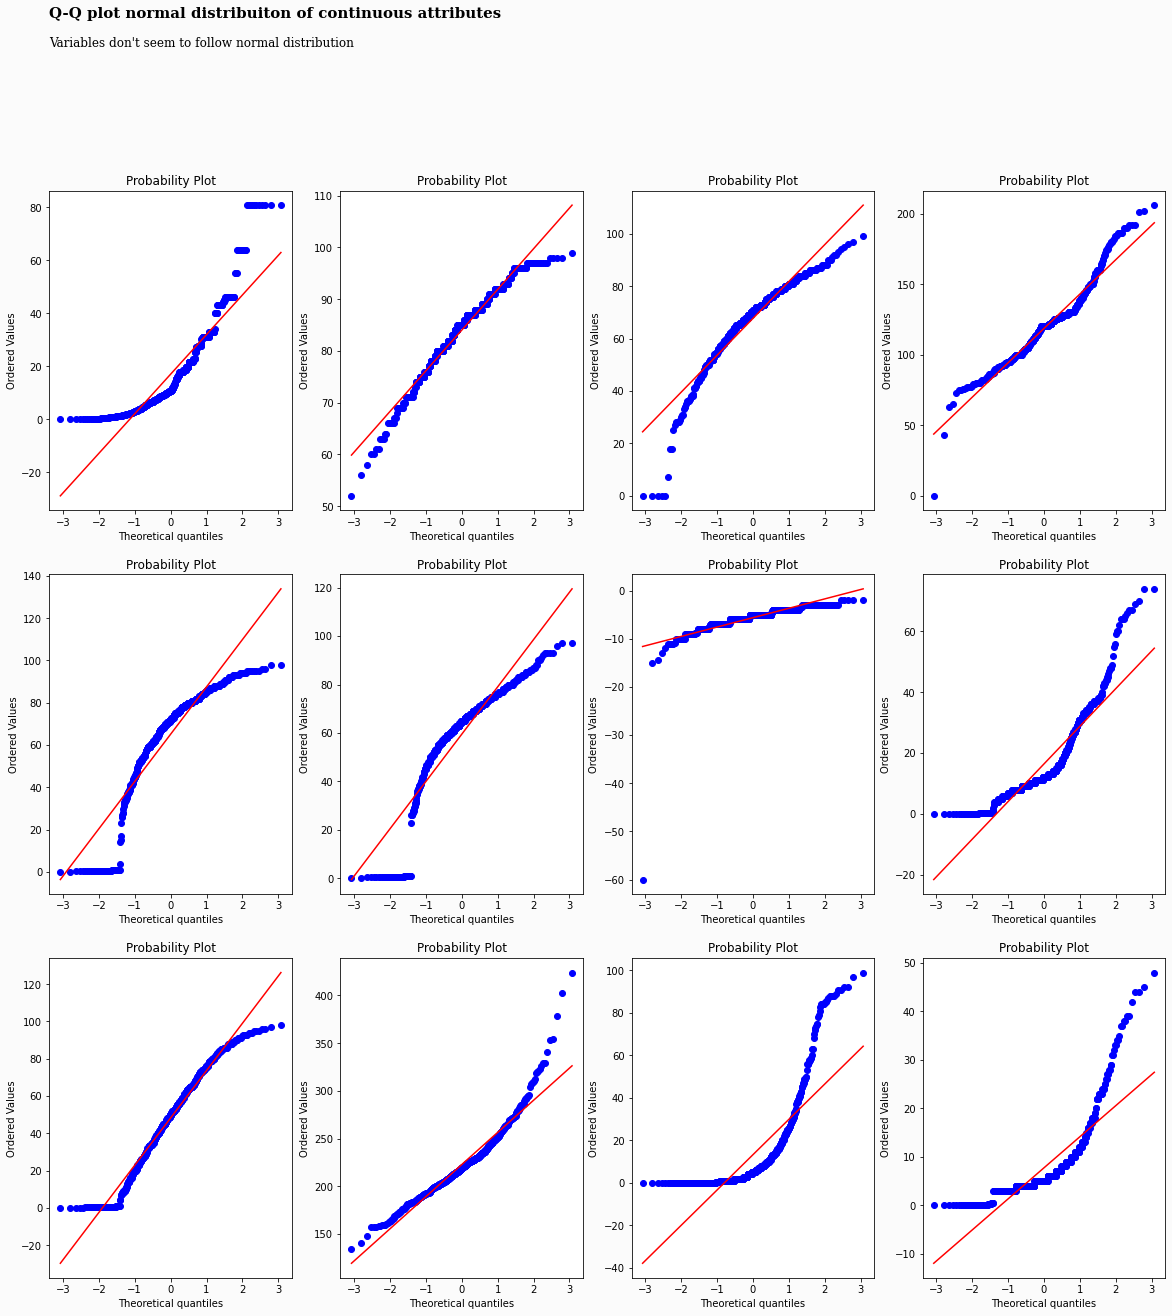

In [29]:
fig = plt.figure(figsize=(20, 20), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Q-Q plot normal distribuiton of continuous attributes', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'Variables don\'t seem to follow normal distribution',fontfamily='serif',fontsize=12) 

for i, feature in enumerate(['followers','artist_popularity', 'track_popularity', 'tempo',
                             'energy','danceability','loudness','liveness',	'valence',
                             'duration','acousticness','speechiness']):
  plt.subplot(3, 4, i+1)
  scipy.stats.probplot(data[feature], plot=plt.gca(), dist='norm')

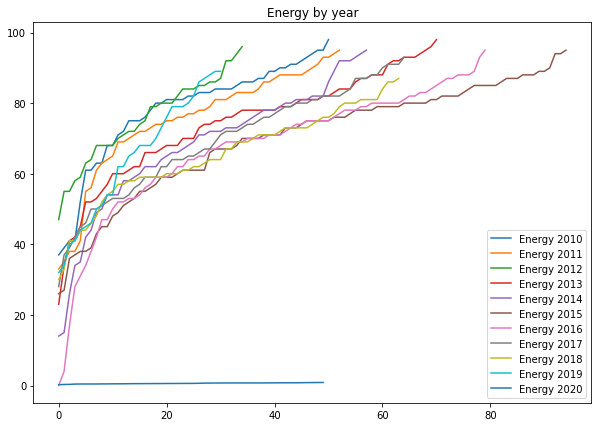

In [34]:
plt.figure(figsize=(10,7))
for year in np.unique(data.year):
    plt.plot(sorted(data[data['year']==year]['energy']), label='Energy ' + str(year))
plt.title('Energy by year')
plt.legend()
plt.show()

We can see that the values for energy in 2020 are very close to 0. 

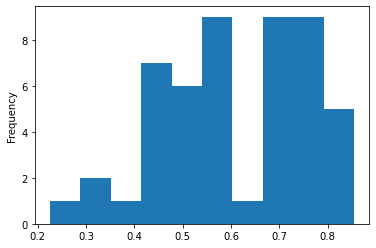

In [39]:
data[data['year']==2020]['energy'].plot.hist(bins=10)
plt.show()

Although from the first graph it looked like the energy was constant and close to 0, from the histogram we can see that it has different values between 0 and 1. This may be due to unequal units of measurement. It turns out that these values were multiplied by 100 in the data set from Kaggle.

In [57]:
data.loc[data.year == 2020, "energy"] = data.loc[data.year == 2020, "energy"]*100

In [65]:
data

,title,artist,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity,is_dance_pop
0,"Hey, Soul Sister",Train,3.693075,78.0,2010,97.000,89.0,67.000,-4.000,8.000,80.000,217.000,19.00000,4.0000,83,0
1,Love The Way You Lie,Eminem,44.814807,94.0,2010,87.000,93.0,75.000,-5.000,52.000,64.000,263.000,24.00000,23.0000,82,0
2,TiK ToK,Kesha,6.410236,81.0,2010,120.000,84.0,76.000,-3.000,29.000,71.000,200.000,10.00000,14.0000,80,1
3,Bad Romance,Lady Gaga,17.680180,89.0,2010,119.000,92.0,70.000,-4.000,8.000,71.000,295.000,0.00000,4.0000,79,1
4,Just the Way You Are,Bruno Mars,31.020064,93.0,2010,109.000,84.0,64.000,-5.000,9.000,43.000,221.000,2.00000,4.0000,78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Lucid Dreams,Juice WRLD,17.857741,96.0,2020,83.903,56.6,0.511,-7.230,0.340,0.218,239.836,0.34900,0.2000,86,0
649,Stuck with U (with Justin Bieber),Ariana Grande,63.874004,96.0,2020,178.765,45.0,0.597,-6.658,0.382,0.537,228.482,0.22300,0.0418,85,1
650,If the World Was Ending - feat. Julia Michaels,JP Saxe,0.260151,76.0,2020,75.801,47.3,0.464,-10.086,0.109,0.604,208.687,0.86600,0.1290,84,0
651,Physical,Dua Lipa,25.495143,95.0,2020,146.967,84.4,0.647,-3.756,0.102,0.746,193.829,0.01370,0.0457,78,1


In [66]:
data.loc[data.year == 2020, "danceability"] = data.loc[data.year == 2020, "danceability"]*100

In [67]:
data.loc[data.year == 2020, "liveness"] = data.loc[data.year == 2020, "liveness"]*100

In [68]:
data.loc[data.year == 2020, "valence"] = data.loc[data.year == 2020, "valence"]*100

In [69]:
data.loc[data.year == 2020, "acousticness"] = data.loc[data.year == 2020, "acousticness"]*100

In [70]:
data.loc[data.year == 2020, "speechiness"] = data.loc[data.year == 2020, "speechiness"]*100

In [72]:
data.to_csv('../data/tracks_with_binary_target.csv')

In [42]:
data_all_genres = pd.read_csv('../data/final_spotify_tracks.csv')
data_all_genres.head()

,title,artist,top genre,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity
0,"Hey, Soul Sister",Train,POP,3.693075,78.0,2010,97.0,89.0,67.0,-4.0,8.0,80.0,217.0,19.0,4.0,83
1,Love The Way You Lie,Eminem,HIPHOP,44.814807,94.0,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82
2,TiK ToK,Kesha,POP,6.410236,81.0,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80
3,Bad Romance,Lady Gaga,POP,17.680180,89.0,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,79
4,Just the Way You Are,Bruno Mars,POP,31.020064,93.0,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78


In [63]:
data_all_genres.loc[data_all_genres.year == 2020, 'energy'] = data_all_genres.loc[data_all_genres.year == 2020, 'energy'] * 100

In [73]:
data_all_genres.loc[data_all_genres.year == 2020, "danceability"] = data_all_genres.loc[data_all_genres.year == 2020, "danceability"]*100

In [74]:
data_all_genres.loc[data_all_genres.year == 2020, "liveness"] = data_all_genres.loc[data_all_genres.year == 2020, "liveness"]*100

In [75]:
data_all_genres.loc[data_all_genres.year == 2020, "valence"] = data_all_genres.loc[data_all_genres.year == 2020, "valence"]*100

In [76]:
data_all_genres.loc[data_all_genres.year == 2020, "acousticness"] = data_all_genres.loc[data_all_genres.year == 2020, "acousticness"]*100

In [77]:
data_all_genres.loc[data_all_genres.year == 2020, "speechiness"] = data_all_genres.loc[data_all_genres.year == 2020, "speechiness"]*100

In [79]:
data_all_genres.to_csv('../data/final_spotify_tracks.csv')

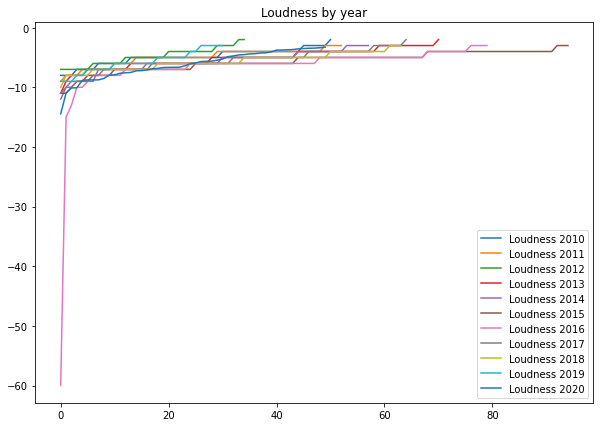

In [80]:
plt.figure(figsize=(10,7))
for year in np.unique(data.year):
    plt.plot(sorted(data[data['year']==year]['loudness']), label='Loudness ' + str(year))
plt.title('Loudness by year')
plt.legend()
plt.show()

We have some very low values for loudness in 2016, this may be a nuivariate outlier and may cause problems later.

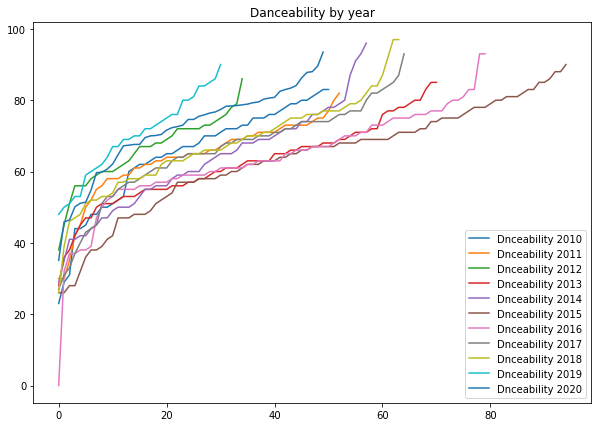

In [82]:
plt.figure(figsize=(10,7))
for year in np.unique(data.year):
    plt.plot(sorted(data[data['year']==year]['danceability']), label='Dnceability ' + str(year))
plt.title('Danceability by year')
plt.legend()
plt.show()

Danceability in 2016 has univariate outliers. Maybe there is some correlation with this value for loudness in 2016

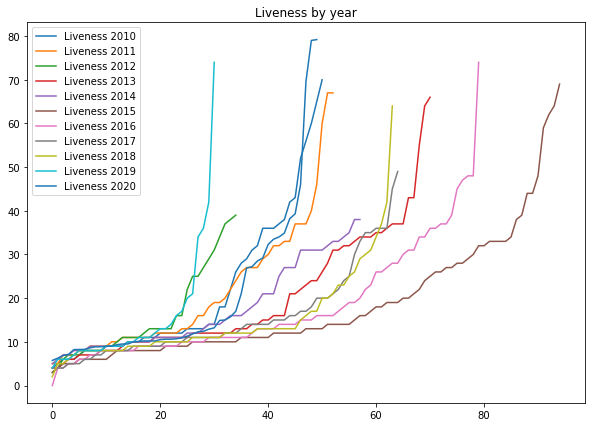

In [83]:
plt.figure(figsize=(10,7))
for year in np.unique(data.year):
    plt.plot(sorted(data[data['year']==year]['liveness']), label='Liveness ' + str(year))
plt.title('Liveness by year')
plt.legend()
plt.show()

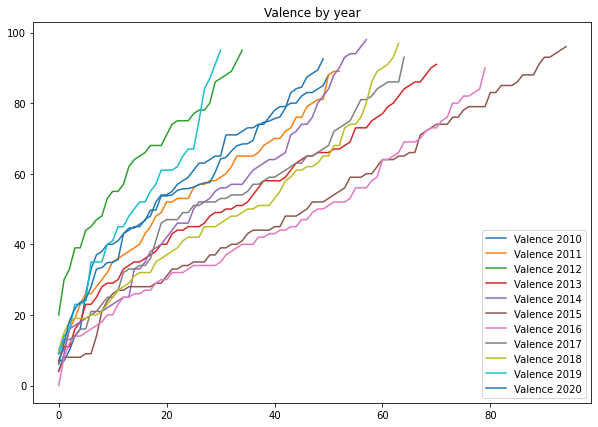

In [85]:
plt.figure(figsize=(10,7))
for year in np.unique(data.year):
    plt.plot(sorted(data[data['year']==year]['valence']), label='Valence ' + str(year))
plt.title('Valence by year')
plt.legend()
plt.show()

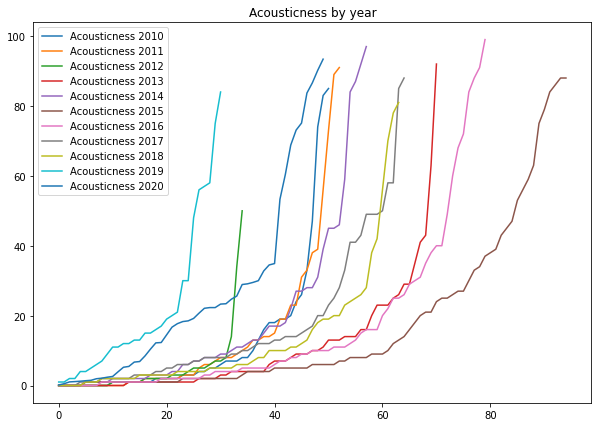

In [86]:
plt.figure(figsize=(10,7))
for year in np.unique(data.year):
    plt.plot(sorted(data[data['year']==year]['acousticness']), label='Acousticness ' + str(year))
plt.title('Acousticness by year')
plt.legend()
plt.show()

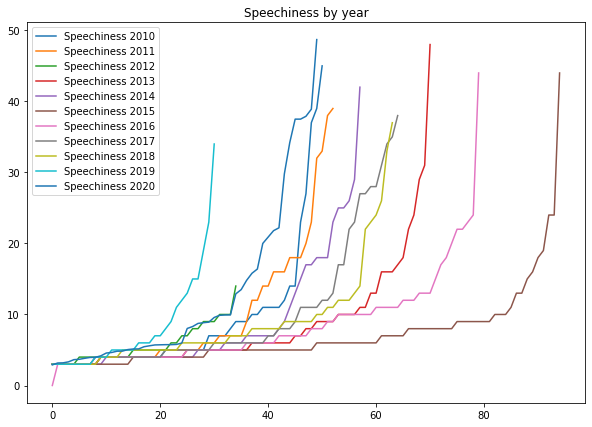

In [87]:
plt.figure(figsize=(10,7))
for year in np.unique(data.year):
    plt.plot(sorted(data[data['year']==year]['speechiness']), label='Speechiness ' + str(year))
plt.title('Speechiness by year')
plt.legend()
plt.show()

In [84]:
data[data['danceability'] < 10]

,title,artist,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity,is_dance_pop
442,Million Years Ago,Adele,27.446503,85.0,2016,0.0,0.0,0.0,-60.0,0.0,0.0,227.0,0.0,0.0,0,0


This is the outlier in many dimensions. I am going to remove it.

In [100]:
data.drop(442, inplace=True)

In [101]:
data.to_csv('../data/tracks_with_binary_target.csv')

In [102]:
data_all_genres[data_all_genres['danceability'] < 10]

,title,artist,top genre,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity
442,Million Years Ago,Adele,BLUES,27.446503,85.0,2016,0.0,0.0,0.0,-60.0,0.0,0.0,227.0,0.0,0.0,0


In [103]:
data_all_genres.drop(442, inplace=True)
data_all_genres.to_csv('../data/final_spotify_tracks.csv')

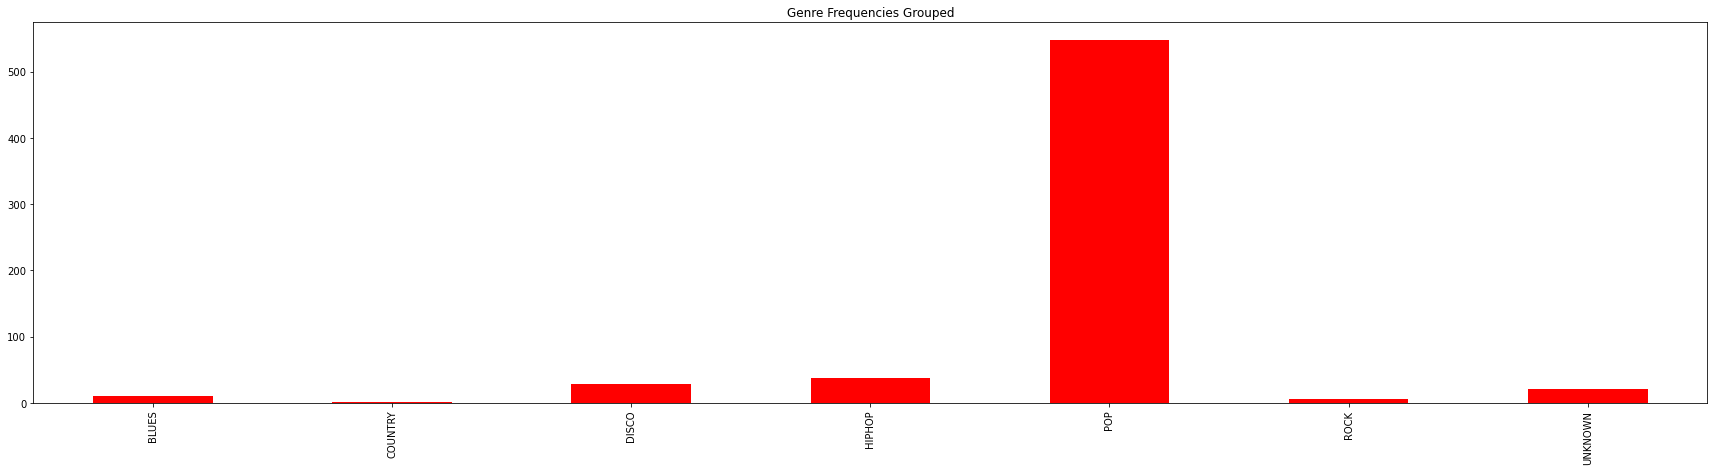

In [104]:
plt.figure()
data_all_genres['top genre'].value_counts().sort_index().plot.bar(color='red', figsize=(30, 7), title="Genre Frequencies Grouped")
plt.show()

Even after grouping the data based on genre hierarchy, the tracks are highly imbalanced. This is going to be a very hard multiclass problem.

<h3>Scaling the Data and Encoding Labels</h3>

In [105]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [106]:
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [133]:
data = pd.read_csv('../data/tracks_with_binary_target.csv')
data = data[data.columns[1:]]

In [134]:
data['artist'] = encoder.fit_transform(data['artist'])

In [135]:
data = data.set_index('title')

In [136]:
columns = data.columns

In [137]:
columns

Index(['artist', 'followers', 'artist_popularity', 'year', 'tempo', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'duration',
       'acousticness', 'speechiness', 'track_popularity', 'is_dance_pop'],
      dtype='object')

In [141]:
data_scaled = pd.DataFrame(scaler.fit_transform(data[data.columns.drop(['artist', 'year', 'is_dance_pop'])]), columns=columns.drop(['artist', 'year', 'is_dance_pop']))

In [142]:
data_scaled.head()

,followers,artist_popularity,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity
0,0.045200,0.553191,0.331288,0.904255,0.594595,0.846154,0.077720,0.808511,0.286207,0.191919,0.024017,0.838384
1,0.554757,0.893617,0.269939,0.946809,0.702703,0.769231,0.647668,0.638298,0.444828,0.242424,0.438865,0.828283
2,0.078870,0.617021,0.472393,0.851064,0.716216,0.923077,0.349741,0.712766,0.227586,0.101010,0.242358,0.808081
3,0.218520,0.787234,0.466258,0.936170,0.635135,0.846154,0.077720,0.712766,0.555172,0.000000,0.024017,0.797980
4,0.383821,0.872340,0.404908,0.851064,0.554054,0.769231,0.090674,0.414894,0.300000,0.020202,0.024017,0.787879


In [143]:
data_scaled.describe()

,followers,artist_popularity,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,0.210459,0.681243,0.465124,0.700831,0.568077,0.727313,0.206554,0.516619,0.306123,0.153685,0.126249,0.684622
std,0.201283,0.169397,0.149722,0.172510,0.178541,0.136239,0.174745,0.237995,0.119824,0.216742,0.173453,0.145873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067227,0.595745,0.349693,0.595745,0.472973,0.626942,0.090674,0.329787,0.227586,0.020202,0.024017,0.616162
50%,0.133557,0.702128,0.472393,0.734043,0.594595,0.769231,0.129534,0.521277,0.293103,0.060606,0.065066,0.707071
75%,0.282099,0.787234,0.527607,0.820745,0.689189,0.846154,0.288212,0.697340,0.358621,0.191919,0.155022,0.787879
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p>The features (excluding the categorical ones) were scaled with MinMaxScaler. This scaler was chosen because StandardScaler is sensitive to outliers, and as we saw in the box plots, the features had a lot of outliers.</p>

<h3>Dimensionality reduction and visualization of the whole dataset</h3>

In [145]:
from sklearn.decomposition import PCA

pca = PCA(2)
decomposed_features = pca.fit_transform(data_scaled)

In [146]:
decomposed_features

array([[-0.29086288, -0.07696808],
       [-0.14937661,  0.45922261],
       [-0.34492702, -0.03056371],
       ...,
       [ 0.55661637, -0.09151303],
       [-0.28122279,  0.24854478],
       [-0.11329014,  0.17879866]])

In [147]:
colors = ['#56f58b','#ff4f42']

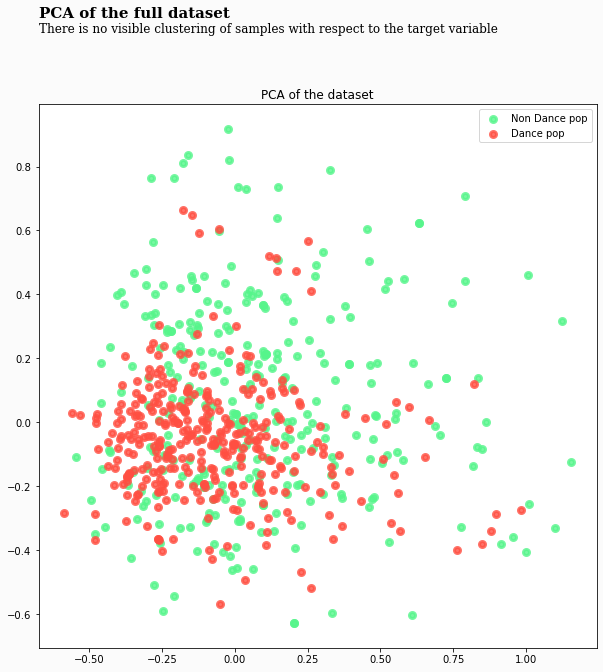

In [148]:
fig = plt.figure(figsize=(10, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'PCA of the full dataset', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'There is no visible clustering of samples with respect to the target variable',fontfamily='serif',fontsize=12) 

for i, color in enumerate(zip(colors)):
    plt.scatter(decomposed_features[data['is_dance_pop'] == i, 0], decomposed_features[data['is_dance_pop'] == i, 1], color=color, alpha=.8, lw=3,
                label='Dance pop' if i==1 else 'Non Dance pop')
plt.legend(loc='best', shadow=False)
plt.title('PCA of the dataset')
plt.show()

We can see that the classes are not easily separable

<h3>Outlier detection</h3>

In [151]:
Q1 = data_all_genres.quantile(0.25)
Q3 = data_all_genres.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

followers            19.476555
artist_popularity     9.000000
year                  4.000000
tempo                29.000000
energy               21.150000
danceability         16.000000
loudness              2.849750
liveness             15.250000
valence              34.550000
duration             38.000000
acousticness         17.000000
speechiness           6.000000
track_popularity     17.000000
dtype: float64


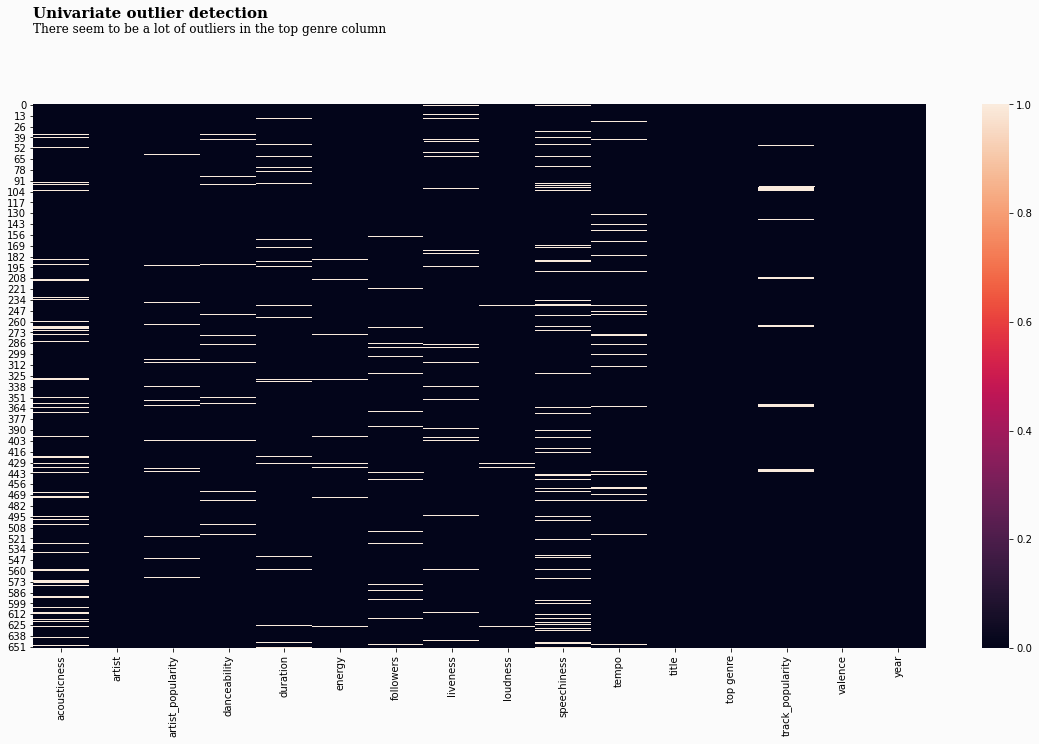

In [152]:
fig = plt.figure(figsize=(20, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Univariate outlier detection', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'There seem to be a lot of outliers in the top genre column',fontfamily='serif',fontsize=12) 

sns.heatmap(((data_all_genres < (Q1 - 1.5 * IQR)) | (data_all_genres > (Q3 + 1.5 * IQR))), ax=plt.gca())
plt.show()

<p>We can see that we have a lot of univariate outliers in the acousticness and speechiness columns. There are a some outliers in other columns as well. </p>

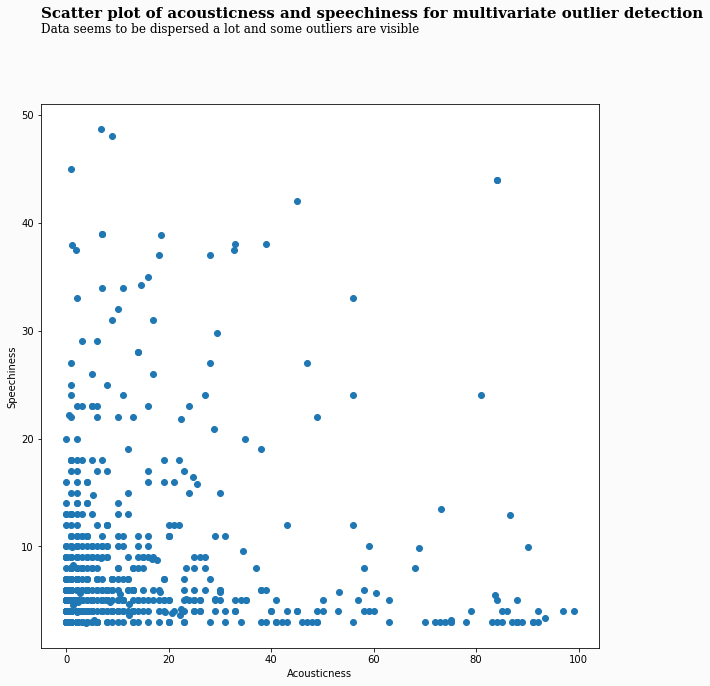

In [153]:
fig = plt.figure(figsize=(10, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Scatter plot of acousticness and speechiness for multivariate outlier detection', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'Data seems to be dispersed a lot and some outliers are visible',fontfamily='serif',fontsize=12) 

plt.scatter(data['acousticness'], data['speechiness'])
plt.xlabel('Acousticness')
plt.ylabel('Speechiness')
plt.show()

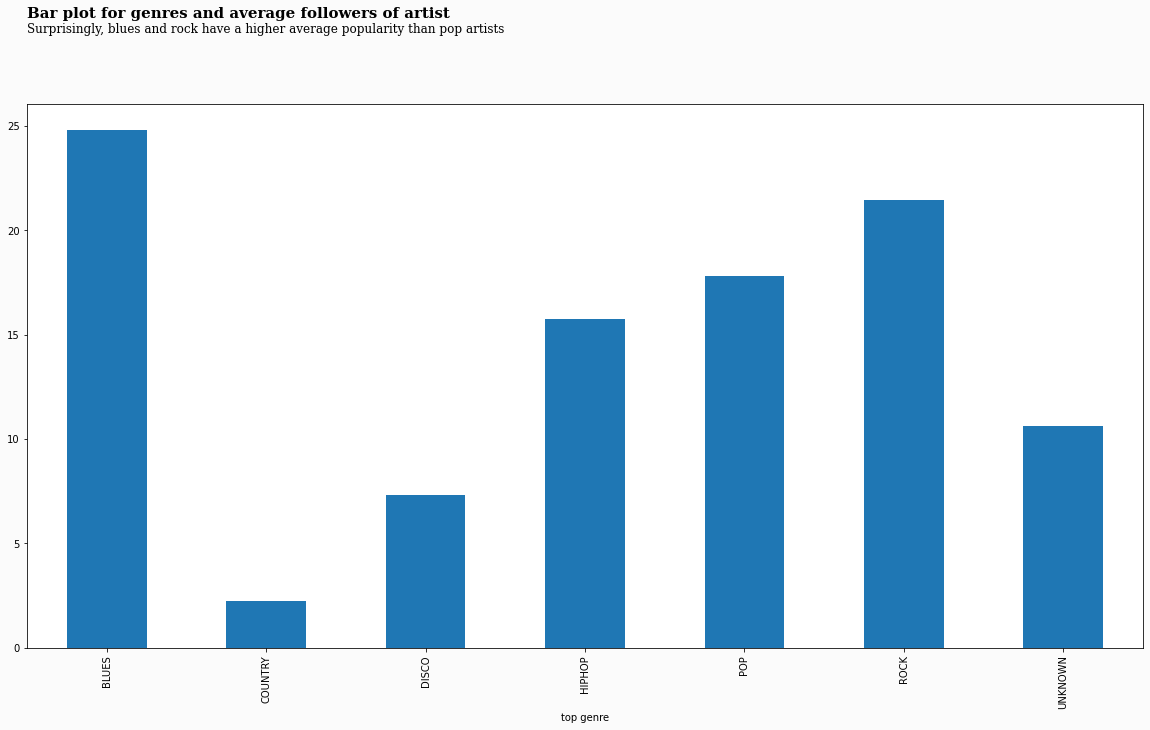

In [155]:
fig = plt.figure(figsize=(20, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Bar plot for genres and average followers of artist', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'Surprisingly, blues and rock have a higher average popularity than pop artists',fontfamily='serif',fontsize=12) 

data_all_genres.groupby('top genre')['followers'].mean().plot.bar(ax=plt.gca())
plt.xticks(rotation=90)
plt.show()

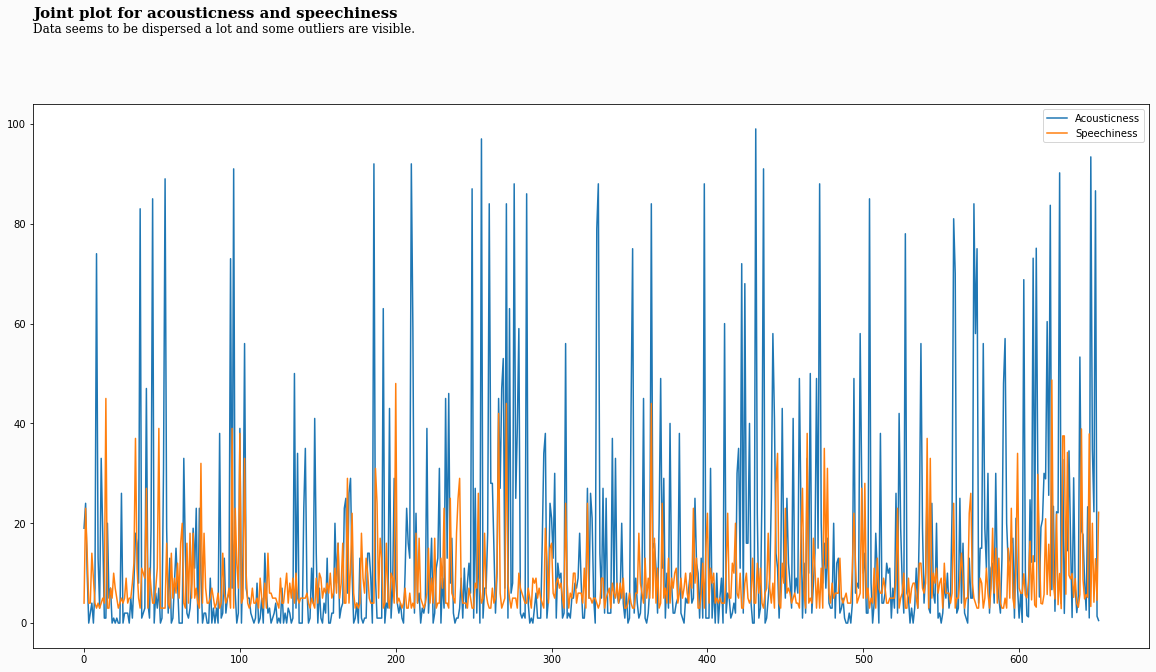

In [164]:
fig = plt.figure(figsize=(20, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Joint plot for acousticness and speechiness', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'Data seems to be dispersed a lot and some outliers are visible. ',fontfamily='serif',fontsize=12) 

plt.plot(data['acousticness'].values, label='Acousticness')
plt.plot(data['speechiness'].values, label = 'Speechiness')
plt.legend()
plt.show()

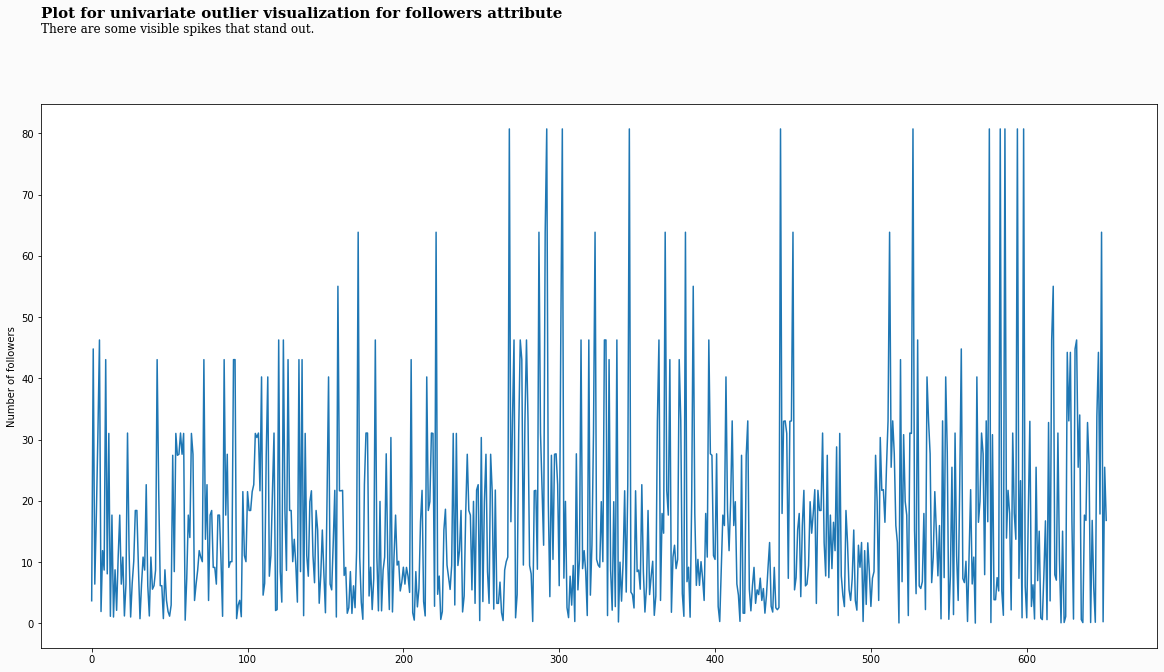

In [165]:
fig = plt.figure(figsize=(20, 10), facecolor="#fbfbfb")
fig.text(0.125,1.0,'Plot for univariate outlier visualization for followers attribute', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.98,'There are some visible spikes that stand out. ',fontfamily='serif',fontsize=12) 

plt.plot(data['followers'].values)
plt.ylabel('Number of followers')
plt.show()